In [1]:
#Importing libraries.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#Reading in the csv file.
pressures = pd.read_csv('Pressure.csv')

In [3]:
#Functions.

#Getting the start indices for future slicing by iterating rows and checking for value 1.0 in 'PumpState' column.
def filtr_start():
    relevant = []
    for index, row in pressures.iterrows():
        if row['PumpState'] == 1.0:
            relevant.append(index)
            
    return relevant


#Getting stop indices for future slicing
def filtr_stop():
    relevant = []
    for i in list(pressures['PumpState'].unique()[1:]):
        if i != 1.0:
            for index, row in pressures.iterrows():
                if row['PumpState'] == i:
                    relevant.append(index)
    return relevant

#Converting start and stop indices to a tuple, which will be used to get the desired slices of data
def slicing():
    slices = []
    for i in start:
        for j in stop:
            if i < j:
                slices.append((i,j))
                break
    return slices

'''Looping through a list of tuples, each tuple represents index values of data
between 'PumpState' == 1.0 (included), and 'PumpState' anything but 1.0 or nan (excluded). 
Slicing the original data frame accordingly and appending slices to a new data frame.'''
def building_csv():
    dataframe = pd.DataFrame()
    for i in slices:
        dataframe = dataframe.append(pressures.iloc[i[0]:i[1]])
    return dataframe

In [4]:
#Running functions, printing results to see if that worked properly and finally saving (meta)result to csv
start = filtr_start()
stop = filtr_stop()
stop = sorted(stop)
slices = slicing()
relevant_pressures = building_csv()
print(start[:10])
print(stop[:10])
print(slices[:10])
relevant_pressures.to_csv('Relevant_pump_states.csv')

[6, 134, 265, 391, 525, 1003, 1138, 1276, 1412, 1533]
[2, 4, 95, 132, 133, 221, 262, 264, 354, 388]
[(6, 95), (134, 221), (265, 354), (391, 480), (525, 611), (1003, 1090), (1138, 1226), (1276, 1367), (1412, 1502), (1533, 1620)]


In [5]:
#Switching index to be represented by 'Date' column and setting its type to DatetimeIndex for future use
relevant_pressures.set_index('Date', inplace=True)
relevant_pressures.index = pd.to_datetime(relevant_pressures.index, infer_datetime_format=True)
type(relevant_pressures.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [49]:
'''Creating a single dataframe that contains daily mean values in separate column and weekly mean values
in separate column by first creating separate dataframes grouped by day/week and concatenating them together.
Next (back)filling the missing values in the 'Pressure_week_average' column to be able to plot it properly.
Dropping columns that do not interest us anymore and finally saving the resulting dataframe into a csv file.''' 
mean_by_day = relevant_pressures.groupby(pd.Grouper(freq='D')).mean()
mean_by_day.fillna(mean_by_day.mean(), inplace=True)
mean_by_week = mean_by_day.groupby(pd.Grouper(freq='W')).mean()
mean_by_day.rename(index=str, columns={'Pressure':'Pressure_day_mean'}, inplace=True)
mean_by_week.rename(index=str, columns={'Pressure':'Pressure_week_average'}, inplace=True)
final = pd.concat([mean_by_day, mean_by_week], axis=1)
final.fillna(method='bfill', inplace = True)
final.drop(['Int', 'PumpState'], axis=1, inplace=True)
final.to_csv('Means.csv')

In [72]:
'''Displaying the whole final dataframe to check if everything looks as it should.'''
final.head(40)

,Int,Pressure_day_mean,PumpState,Int,Pressure_week_average,PumpState
2017-08-13 00:00:00,0.0,590.046937,1.0,0.0,590.046937,1.0
2017-08-14 00:00:00,0.0,611.984926,1.0,0.0,579.457743,1.0
2017-08-15 00:00:00,0.0,552.844779,1.0,0.0,579.457743,1.0
2017-08-16 00:00:00,0.0,609.394727,1.0,0.0,579.457743,1.0
2017-08-17 00:00:00,0.0,609.394727,1.0,0.0,579.457743,1.0
2017-08-18 00:00:00,0.0,562.028410,1.0,0.0,579.457743,1.0
2017-08-19 00:00:00,0.0,556.988181,1.0,0.0,579.457743,1.0
2017-08-20 00:00:00,0.0,553.568451,1.0,0.0,579.457743,1.0
2017-08-21 00:00:00,0.0,641.447638,1.0,0.0,627.202823,1.0
2017-08-22 00:00:00,0.0,621.122263,1.0,0.0,627.202823,1.0


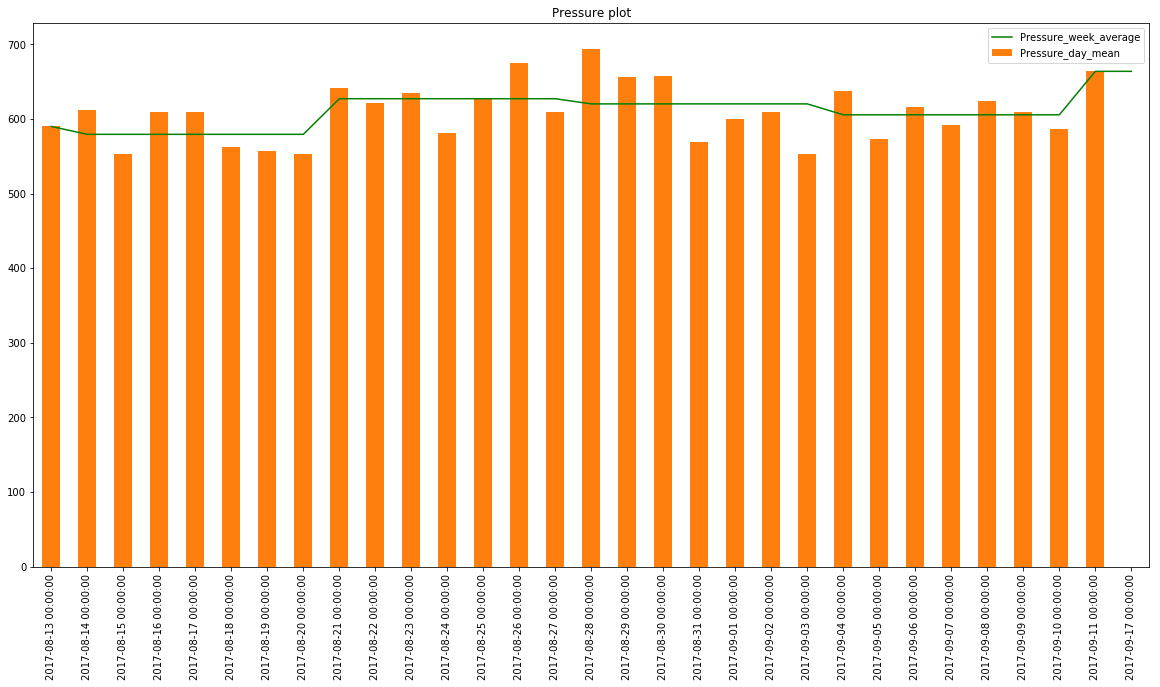

In [63]:
#Plotting the values of 'Pressure_day_mean' - bars, and Pressure_week_average - line in the same plot
ax = final.plot(y='Pressure_week_average', use_index=True, kind='line', title='Pressure plot', figsize=(20,10), color='green')
final.plot(y='Pressure_day_mean', kind='bar', ax=ax, use_index=True, color='C1')
ax.set_xticklabels(final.index,rotation=90)